# Introduction to NumPy

* [NumPy](https://docs.scipy.org/doc/numpy/reference/) is a widely-used scientific computing package for brings fast array processing to Python

* Runs fast compiled code written in C & Fortran under the hood

Consider the following example... we want to calculate the mean of 10,000 numbers

We will do this in both standard Python and using NumPy and compare computing times

#### Python version

In [2]:
%%timeit

python_list = list(range(10000))
sum(python_list) / len(python_list)

10000 loops, best of 3: 178 µs per loop


#### NumPy version

In [3]:
import numpy as np

In [4]:
%%timeit

numpy_array = np.arange(10000)
numpy_array.mean()

The slowest run took 11.17 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 21.3 µs per loop


As you can see, the NumPy version is significantly faster
* Much of this speed-up is a result of NumPy knowing the **type** of data it is dealing with

In [5]:
a = np.array([1.5, 2, 4])
a

array([1.5, 2. , 4. ])

All elements of the array must be of the same type

In [6]:
[type(a_element) for a_element in a]

[numpy.float64, numpy.float64, numpy.float64]

We can specify the data type of the array

The most common data types are:

* float64: 64 bit floating point number
* int64: 64 bit integer
* bool: 8 bit True or False

In [7]:
a = np.array([1.8, 2, 4], dtype=int)
a

array([1, 2, 4])

In [8]:
[type(a_element) for a_element in a]

[numpy.int64, numpy.int64, numpy.int64]

By construction, one dimensional NumPy arrays are **flat**

In [9]:
z = np.zeros(10)

In [10]:
z.shape

(10,)

Although we can transform them into "column vectors" and "row vectors" if we wish:

In [11]:
z.shape = (10, 1)
z

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [12]:
z.reshape(2, 5)

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

## NumPy array basics

A reference sheet can be found at [QuantEcon.cheatsheets](https://cheatsheets.quantecon.org/)

In [13]:
z = np.empty(3)
z

array([1.5, 2. , 4. ])

In [14]:
z = np.linspace(2, 4, 5)  # From 2 to 4, with 5 elements
z

array([2. , 2.5, 3. , 3.5, 4. ])

In [15]:
z = np.identity(2)
z

array([[1., 0.],
       [0., 1.]])

We can build arrays from lists and tuples, like so:

In [16]:
z = np.array([10, 20])

2D array from list of lists:

In [17]:
z = np.array([[1, 2], [3, 4]]) 
z

array([[1, 2],
       [3, 4]])

### Indexing

In [18]:
z = np.linspace(1, 2, 5)
z

array([1.  , 1.25, 1.5 , 1.75, 2.  ])

In [19]:
z[0]

1.0

In [20]:
z[0:2]  # Two elements, starting at element 0 up until (but not including) 2

array([1.  , 1.25])

In [21]:
z[-1]  # Last element

2.0

In [22]:
z[::2]  # Every second element

array([1. , 1.5, 2. ])

In [23]:
z = np.array([[1, 2], [3, 4]])
z

array([[1, 2],
       [3, 4]])

In [24]:
z[0, 1]

2

Selecting rows and columns:

In [25]:
z[0, :]

array([1, 2])

In [26]:
z[:, 1]

array([2, 4])

### NumPy array methods

Type `.` after your numpy array name and click `tab` to see available methods

In [27]:
a = np.array((4, 3, 2, 1))
a

array([4, 3, 2, 1])

In [28]:
a.sum()               # Sum

10

In [29]:
a.shape = (2, 2)
a.T                   # Equivalent to a.transpose()

array([[4, 2],
       [3, 1]])

### Arithmetic operations

Standard arithmetic operators act **elementwise** on arrays:

In [30]:
a = np.array([1, 2, 3, 4])
b = np.array([5, 6, 7, 8])
a + b

array([ 6,  8, 10, 12])

In [31]:
a * b

array([ 5, 12, 21, 32])

In [32]:
a + 10

array([11, 12, 13, 14])

In [33]:
A = np.ones((2, 2))
B = np.ones((2, 2))
A + B

array([[2., 2.],
       [2., 2.]])

In [34]:
A + 10

array([[11., 11.],
       [11., 11.]])

In [35]:
A * B

array([[1., 1.],
       [1., 1.]])

As you can see, `*` is *not* matrix multiplication.

Here's how you do it:

In [36]:
A = np.ones((2, 2))
B = np.ones((2, 2))
A @ B

array([[2., 2.],
       [2., 2.]])

In [37]:
A = np.array((1, 2))
B = np.array((10, 20))
A @ B

50

## Exercise

Write a function `matrix_power` to compute $A^n$
* The function should take a square array and an integer as arguments

In [38]:
def matrix_power(A, n):
    A = np.asarray(A)
    A_new = A
    for i in range(n-1):
        A_new = A_new @ A
    return A_new

In [39]:
A = [[1, 1], [1, 1]]

matrix_power(A, 5)

array([[16, 16],
       [16, 16]])

### Implications of mutability

* NumPy arrays are mutable, ie. their contents can be changed
* This has an implication which often tricks people...

In [40]:
a = np.ones(3)
a

array([1., 1., 1.])

The next statement binds `b` to the same object

In [41]:
b = a

Now changing `b` mutates the data that `a` points to

In [42]:
b[0] = 0.0
a

array([0., 1., 1.])

In [43]:
a is b

True

How to make a separate copy when you need to

* Note that making a copy is a more expensive operation

In [44]:
a = np.ones(3)
a

array([1., 1., 1.])

In [45]:
b = np.copy(a)
b[0] = 2
b

array([2., 1., 1.])

In [46]:
a

array([1., 1., 1.])

### Ufuncs

* *Universal functions* are *vectorized functions* that act element-wise on arrays
* Instead of looping through an array and applying an operation, the operation is sent in batches to optimized C and Fortran code

In [47]:
z = np.arange(10000)
z_2 = np.empty_like(z)

In [48]:
%%timeit

for i in z:
    z_2[:] = z**2

10 loops, best of 3: 77 ms per loop


In [49]:
%%timeit

z**2

The slowest run took 13.83 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 4.29 µs per loop


Scalar functions (`sin`, `log`, `exp`, etc.) act individually on scalars and elementwise on arrays

A list of available ufuncs can be found [here](https://docs.scipy.org/doc/numpy-1.14.0/reference/ufuncs.html#available-ufuncs) 

In [50]:
np.sin(1)

0.8414709848078965

In [51]:
z = np.array([1, 2, 3])
np.sin(z)

array([0.84147098, 0.90929743, 0.14112001])

### NumPy Subpackages

The `random` subpackage:

In [52]:
z = np.random.randn(5)

In [53]:
y = np.random.binomial(10, 0.5, size=1000) 
y.mean()

4.974

The `linalg` subpackage

In [54]:
A = np.array([[1, 2], [3, 4]])

np.linalg.det(A)           # Compute the determinant

-2.0000000000000004

In [55]:
np.linalg.inv(A)           # Compute the inverse

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

Solve $Ax = B$

In [56]:
B = np.array([3, 1])
np.linalg.solve(A, B)

array([-5.,  4.])

Computer $A^n$

In [57]:
np.linalg.matrix_power(A, 5)

array([[1069, 1558],
       [2337, 3406]])

## Exercise

Consider a linear regression model

$$
y = X \beta + \varepsilon \quad \quad \varepsilon \sim N(0, 1)
$$

We can estimate $\beta$ as
$$
\hat{\beta} = (X'X)^{-1} X' y
$$

where $X'$ is the transpose of $X$

Given

$$
y =
\begin{bmatrix}
3 \\
7 \\
10 \\
5 \\
\end{bmatrix}
$$

$$
X = 
\begin{bmatrix}
5 & 3 \\
2 & 3 \\
3 & 1 \\
2 & 8 \\
\end{bmatrix}
$$

Compute $\hat{\beta}$

In [58]:
y = np.array([3, 7, 10, 5])
X = np.array([[5, 3], 
              [2, 3], 
              [3, 1], 
              [2, 8]])

In [59]:
np.linalg.solve(X.T @ X, X.T @ y)

array([1.33987275, 0.31813362])

## Exercise

We can represent an AR(1) model in the form

$$
Ay = \varepsilon \quad \quad \varepsilon \sim N(0, 1)
$$

where $A$ is

$$ A = \begin{bmatrix} 1  & 0 & \cdots & 0 & 0  \cr
                       -a  & 1 & \cdots & 0 & 0 \cr
                       \vdots & \vdots & \cdots & \vdots & \vdots \cr
                       \vdots & \vdots & \cdots & 1 & 0 \cr
                       0 & 0 & \cdots & -a & 1 \end{bmatrix} $$
                       
and $y$ and $\varepsilon$ are $(T x 1)$ vectors

Generate an AR(1) series with $T=100$ and $\alpha = 0.9$ using matrix algebra

Hint: you will need to use `np.eye`, `np.random.randn` and `np.linalg.inv`

In [60]:
T = 100
α = 0.9
ɛ = np.random.randn(T)
A = np.eye(T) + -α * np.eye(T, k=-1)
y = np.linalg.inv(A) @ ɛ

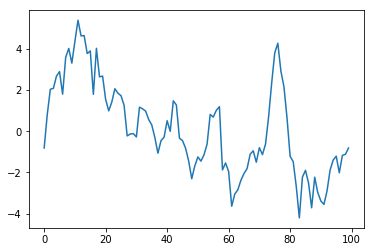

In [61]:
import matplotlib.pyplot as plt

plt.plot(y)
plt.show()

### More resources

* [QuantEcon NumPy Tutorial](https://lectures.quantecon.org/py/numpy.html)
* [QuantEcon Numerical Computing Cheatsheet](https://cheatsheets.quantecon.org/)
* [Introduction to Numerical Computing with NumPy - SciPy 2017](https://www.youtube.com/watch?v=lKcwuPnSHIQ&ab_channel=Enthought)
* [NumPy documentation](https://docs.scipy.org/doc/numpy/reference/)